In [59]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import mnist
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

In [60]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [61]:
batch_size = 100 # Размер мини-выборки
nb_classes = 10 # Количество классов изображений
nb_epoch = 25 # Количество эпох для обучения
img_rows, img_cols = 28, 28 # Размер изображений

In [62]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

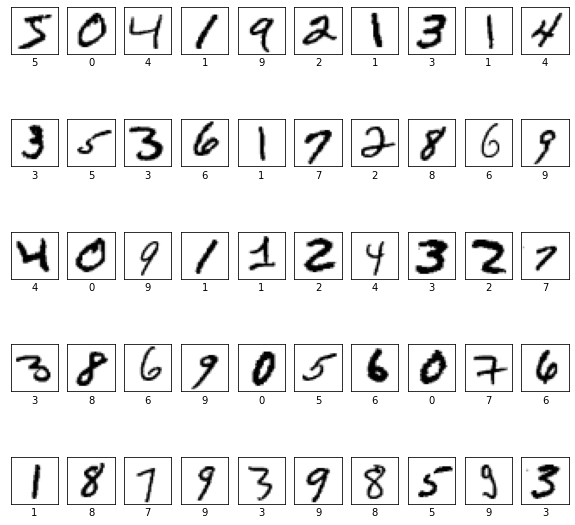

In [63]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

In [64]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train / 255 
x_test = x_test / 255 

In [65]:
n = 0
print(y_train[n])

5


In [66]:
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [67]:
print(y_train[n])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [68]:
model = Sequential() # Создаем последовательную модель нейронной сети
model.add(Dense(400, input_dim=784, activation="tanh")) # Входной полносвязный слой, 400 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=800, activation="tanh")) # 1 скрытый слой
model.add(Dense(400, input_dim=800, activation="tanh")) # 2 скрытый слой
model.add(Dense(400, input_dim=800, activation="tanh")) # 3 скрытый слой
model.add(Dense(400, input_dim=800, activation="tanh")) # 4 скрытый слой
model.add(Dense(400, input_dim=800, activation="tanh")) # 5 скрытый слой
model.add(Dense(10, activation="softmax")) # Выходной полносвязный слой, 10 нейронов (по количеству классов)

In [69]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"]) 

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_23 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_24 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_25 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_26 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_27 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_28 (Dense)             (None, 10)               

In [70]:
history = model.fit(x_train, y_train, 
                    batch_size=200, 
                    epochs=20,
                    validation_split=0.2, # Доля валидационной выборки для контроля переобучения
                    verbose=1) #verbose=0 ничего не покажет, verbose=1 покажет анимированный индикатор выполнения (progress_bar), verbose=2 будет просто указать номер эпохи

Epoch 1/20
240/240 [==============================] - 3s 14ms/step - loss: 0.8481 - accuracy: 0.7930 - val_loss: 0.4482 - val_accuracy: 0.8831
Epoch 2/20
240/240 [==============================] - 3s 13ms/step - loss: 0.4162 - accuracy: 0.8860 - val_loss: 0.3526 - val_accuracy: 0.9000
Epoch 3/20
240/240 [==============================] - 3s 12ms/step - loss: 0.3523 - accuracy: 0.9006 - val_loss: 0.3157 - val_accuracy: 0.9104
Epoch 4/20
240/240 [==============================] - 3s 12ms/step - loss: 0.3213 - accuracy: 0.9082 - val_loss: 0.2955 - val_accuracy: 0.9158
Epoch 5/20
240/240 [==============================] - 3s 12ms/step - loss: 0.3005 - accuracy: 0.9133 - val_loss: 0.2792 - val_accuracy: 0.9197
Epoch 6/20
240/240 [==============================] - 3s 13ms/step - loss: 0.2846 - accuracy: 0.9184 - val_loss: 0.2671 - val_accuracy: 0.9233
Epoch 7/20
240/240 [==============================] - 3s 14ms/step - loss: 0.2722 - accuracy: 0.9215 - val_loss: 0.2570 - val_accuracy: 0.9274

In [13]:
scores = model.evaluate(x_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

313/313 [==============================] - 1s 2ms/step - loss: 0.1768 - accuracy: 0.9479
Доля верных ответов на тестовых данных, в процентах: 94.79


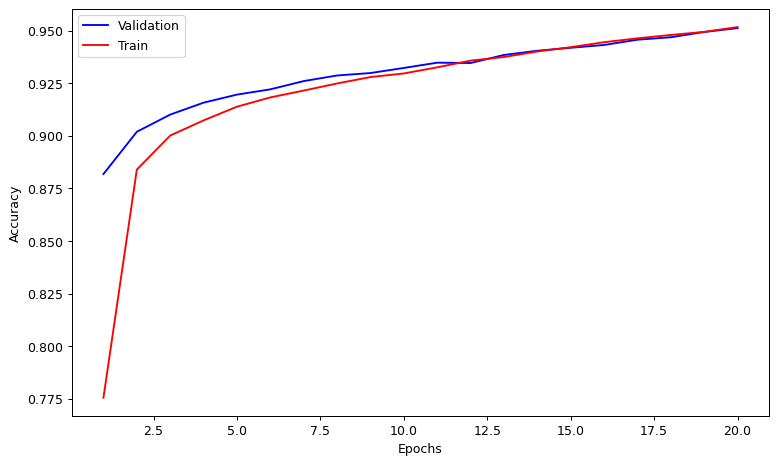

In [14]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.figure(figsize=(10,6), dpi=90)
plt.plot(epochs, val_acc_values, 'b', label='Validation')
plt.plot(epochs, acc_values, 'r', label='Train')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
n_test = 1
x = x_test[n_test]
x = np.expand_dims(x, axis=0)
prediction = model.predict(x)
prediction

array([[1.56441808e-03, 3.35057219e-03, 9.69146788e-01, 9.11452062e-03,
        4.02130723e-07, 4.18579951e-03, 1.09420195e-02, 2.59614907e-08,
        1.69557787e-03, 1.37769305e-07]], dtype=float32)

In [16]:
prediction = np.argmax(prediction[0])
print("Название класса:", classes[prediction])

Название класса: 2


In [17]:
img_path = '0.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255
prediction = model.predict(x)
prediction = np.argmax(prediction)
print("Название класса:", classes[prediction])

Название класса: 0


In [18]:
img_path = '1.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255
prediction = model.predict(x)
prediction = np.argmax(prediction)
print("Название класса:", classes[prediction])

Название класса: 6


In [19]:
img_path = '2.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255
prediction = model.predict(x)
prediction = np.argmax(prediction)
print("Название класса:", classes[prediction])

Название класса: 2


In [20]:
img_path = '3.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255
prediction = model.predict(x)
prediction = np.argmax(prediction)
print("Название класса:", classes[prediction])

Название класса: 3


In [21]:
img_path = '4.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255
prediction = model.predict(x)
prediction = np.argmax(prediction)
print("Название класса:", classes[prediction])

Название класса: 7


In [22]:
img_path = '5.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255
prediction = model.predict(x)
prediction = np.argmax(prediction)
print("Название класса:", classes[prediction])

Название класса: 5


In [23]:
img_path = '6.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255
prediction = model.predict(x)
prediction = np.argmax(prediction)
print("Название класса:", classes[prediction])

Название класса: 6


In [24]:
img_path = '7.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255
prediction = model.predict(x)
prediction = np.argmax(prediction)
print("Название класса:", classes[prediction])

Название класса: 2


In [25]:
img_path = '8.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255
prediction = model.predict(x)
prediction = np.argmax(prediction)
print("Название класса:", classes[prediction])

Название класса: 5


In [26]:
img_path = '9.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255
prediction = model.predict(x)
prediction = np.argmax(prediction)
print("Название класса:", classes[prediction])

Название класса: 3


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


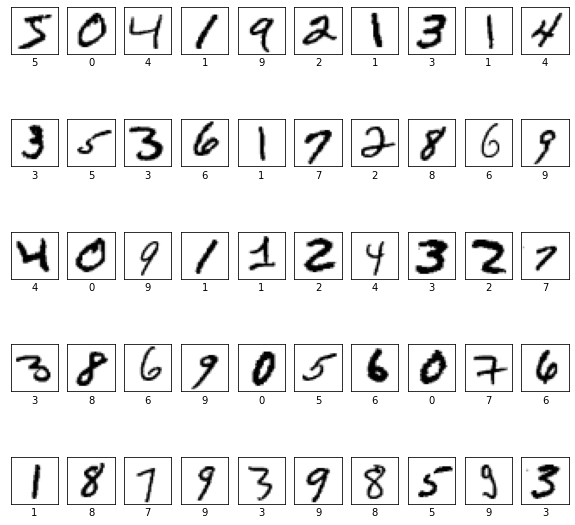

In [50]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)
print(y_train[n])

In [56]:
# Создаем последовательную модель нейронной сети
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(img_rows, (3, 3), padding='same',
                        input_shape=(img_rows, img_cols, 1), activation='relu'))
# Второй сверточный слой
model.add(Conv2D(img_rows, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(2 * img_rows, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(2 * img_rows, (3, 3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(8 * img_rows, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(nb_classes, activation='softmax'))

In [57]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 28)        280       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 28)        7084      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 28)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 28)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 56)        14168     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 12, 56)        28280     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 56)         

In [58]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.2,
              shuffle=True,
              verbose=2)

Epoch 1/25


ValueError: in user code:

    C:\Users\Graf35\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\Graf35\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Graf35\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Graf35\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Graf35\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Graf35\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\Graf35\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\Graf35\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\Graf35\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_6 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: [100, 28, 28]


In [77]:
from tensorflow.keras import backend as K
K.tensorflow_backend._get_available_gpus()
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

AttributeError: module 'tensorflow.keras.backend' has no attribute 'tensorflow_backend'

In [78]:
tf.debugging.set_log_device_placement(True)

# Place tensors on the CPU
with tf.device('/CPU:0'):
  a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# Run on the GPU
c = tf.matmul(a, b)
print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [79]:
from tensorflow.compat.v1.keras import backend as K
K.tensorflow_backend._get_available_gpus()

AttributeError: module 'tensorflow.compat.v1.keras.backend' has no attribute 'tensorflow_backend'

In [80]:
tf.debugging.set_log_device_placement(True)

# Create some tensors
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [83]:
tf.config.experimental.list_physical_devices('GPU')

[]